In [20]:
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt

In [21]:

time = torch.arange(0.,20).float()
print(time)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])


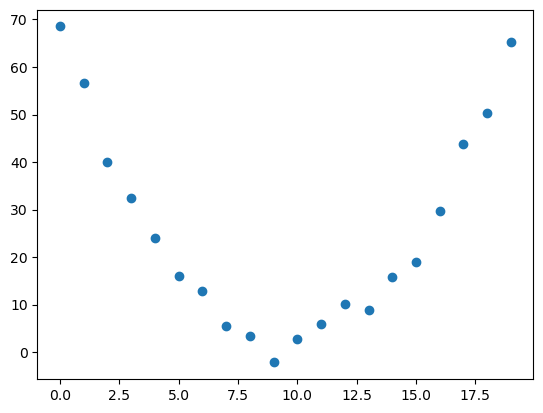

In [22]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 +1
plt.scatter(time,speed)

## a*(time**2)+(b*time)+c

In [23]:
def f(t,params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [24]:
#Mean Squared Error
def mse(preds,targets):
    return ((preds-targets)**2).mean()

# Step 1: Initialize the parameters

In [25]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.3223,  0.3506, -0.2851], requires_grad=True)

# Calculate the predictions

In [26]:
preds = f(time,params)
preds

tensor([  -0.2851,   -0.2568,   -0.8733,   -2.1344,   -4.0403,   -6.5908,
          -9.7859,  -13.6258,  -18.1103,  -23.2396,  -29.0135,  -35.4320,
         -42.4953,  -50.2032,  -58.5558,  -67.5531,  -77.1951,  -87.4818,
         -98.4131, -109.9891], grad_fn=<AddBackward0>)

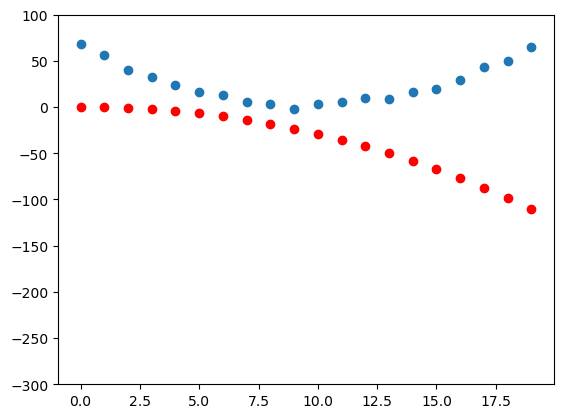

In [27]:
def show_preds(preds,ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time,to_np(preds),color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

# Step 3:  Calculate the loss

In [28]:
loss = mse(preds,speed)
loss

tensor(5870.3613, grad_fn=<MeanBackward0>)

# Step 4: Calculate the gradients

In [29]:
loss.backward()
params.grad

tensor([-24292.1172,  -1555.9580,   -124.4197])

In [30]:
params.grad * 1e-5

tensor([-0.2429, -0.0156, -0.0012])

In [31]:
params

tensor([-0.3223,  0.3506, -0.2851], requires_grad=True)

# Step 5: Step the weights

In [32]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

preds = f(time,params)
mse(preds,speed)

tensor(1618.8423, grad_fn=<MeanBackward0>)

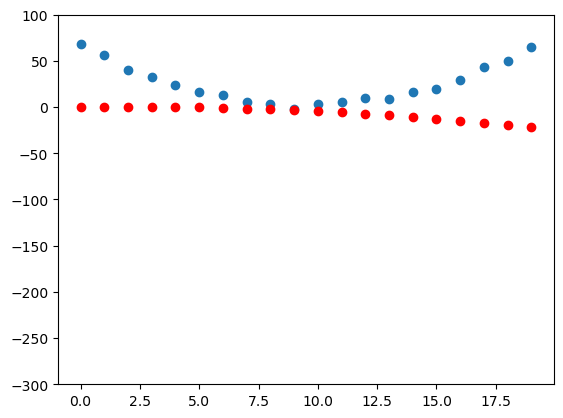

In [33]:
show_preds(preds)

In [34]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

# Step 6: Repeat the process

In [35]:
for i in range(10): apply_step(params)

1618.84228515625
814.322265625
662.0797119140625
633.2683715820312
627.813720703125
626.7788696289062
626.5805053710938
626.5403442382812
626.5301513671875
626.5255126953125


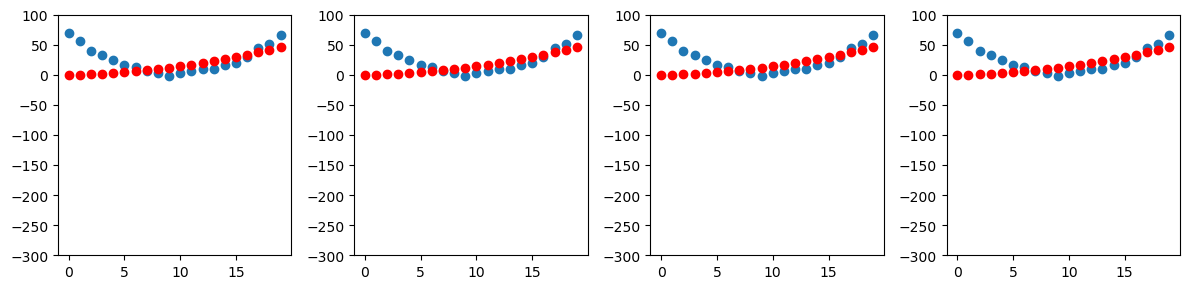

In [36]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()